Name: Anchal Rajopadhyaya

2410683

L5CG13


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and technology of AI/Assessment/forestfires.csv")


---
(a) When and by whom was the dataset created?


*   This dataset was created by Paulo Cortez and A.Morais on 2007



---



(b) How did you access the dataset?


*   THe dataset is accessible through Kaggle.
*  https://www.kaggle.com/datasets/elikplim/forest-fires-data-set



---



(c) How does it align with the chosen UNSDG?


*   UNSDG Goal 15: Life on Land as it contributed to sustainable forest management and wildfire prevention.


---


(d) List all the attributes (columns) present in the dataset.


In [ ]:

print(df.columns)

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')




1.   How do temperature and humidity affect the likelihood of forest fires?
2.  What is the relationship between wind speed and the spread of forest fires?
3. What is the distribution of burned forest areas in the dataset?


In [ ]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.shape

(517, 11)

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
X,0
Y,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0
wind,0
rain,0


In [ ]:
df = df.drop(['month','day'], axis=1)

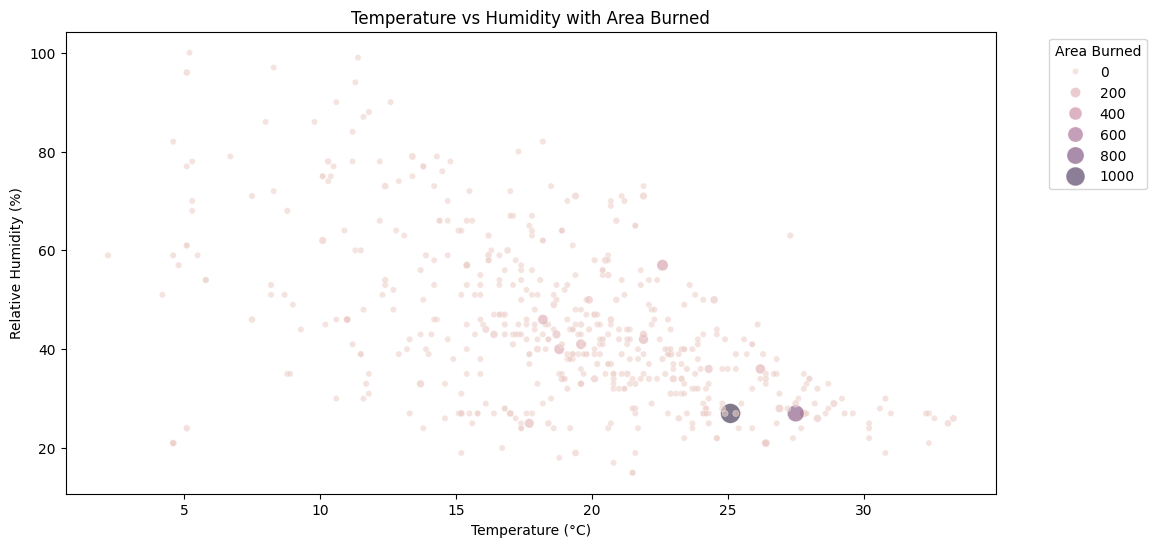

In [ ]:
# Scatter plot of Temperature vs Humidity colored by Area Burned
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='RH', hue='area', size='area', sizes=(20, 200), data=df, alpha=0.6)
plt.title('Temperature vs Humidity with Area Burned')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.legend(title='Area Burned', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

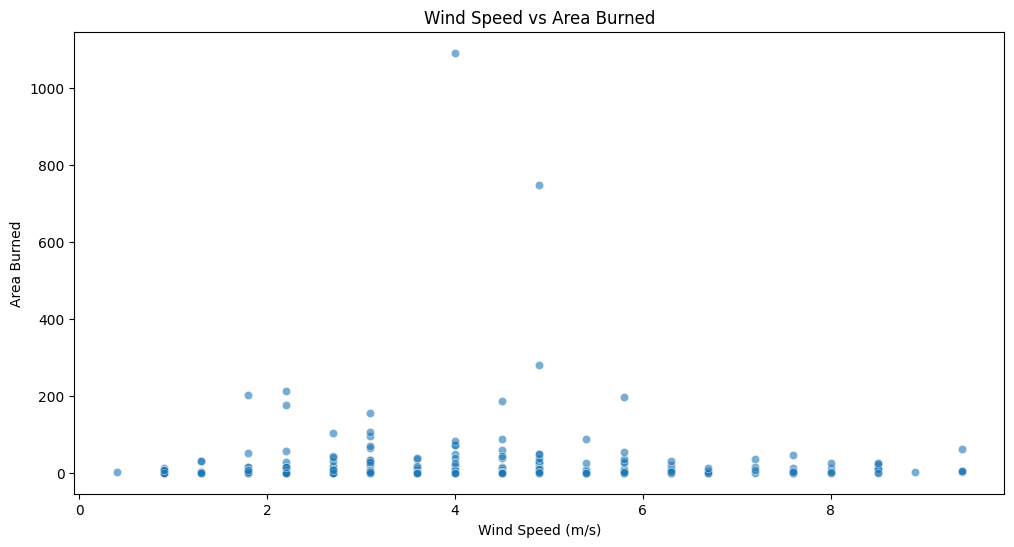

In [ ]:
# Scatter plot of Wind Speed vs Area Burned
plt.figure(figsize=(12, 6))
sns.scatterplot(x='wind', y='area', data=df, alpha=0.6)
plt.title('Wind Speed vs Area Burned')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Area Burned')
plt.show()

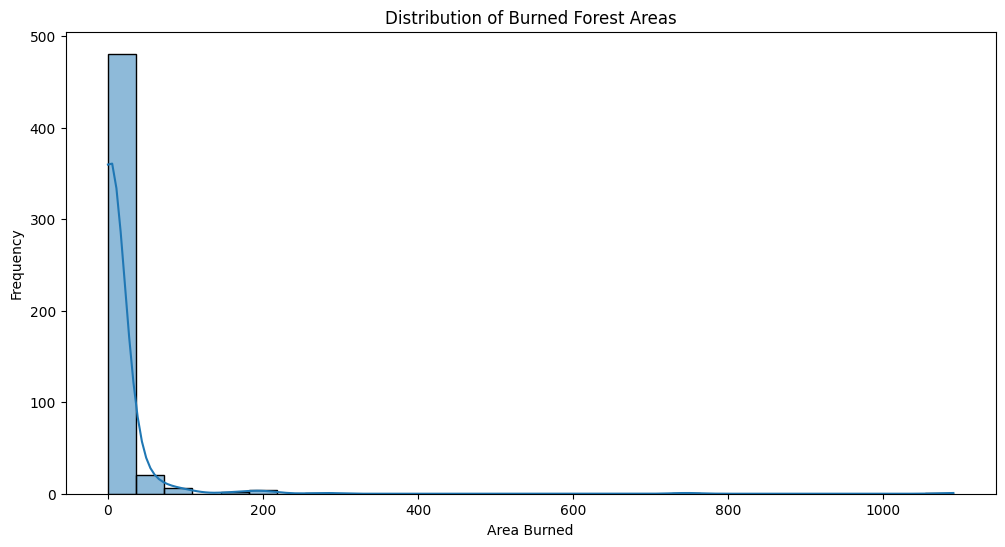

In [ ]:
# Histogram of Area Burned
plt.figure(figsize=(12, 6))
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribution of Burned Forest Areas')
plt.xlabel('Area Burned')
plt.ylabel('Frequency')
plt.show()

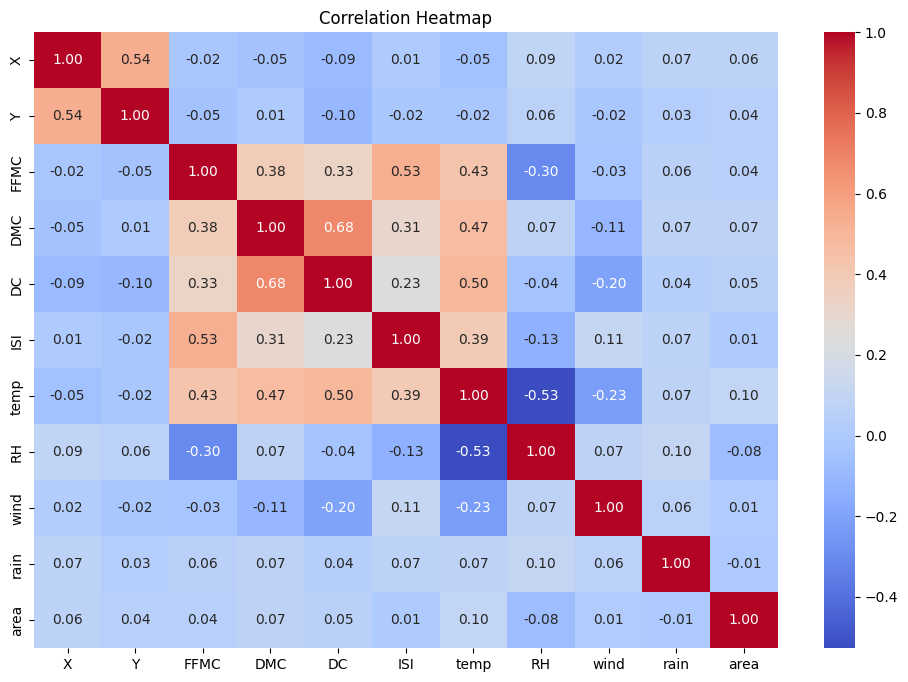

In [ ]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

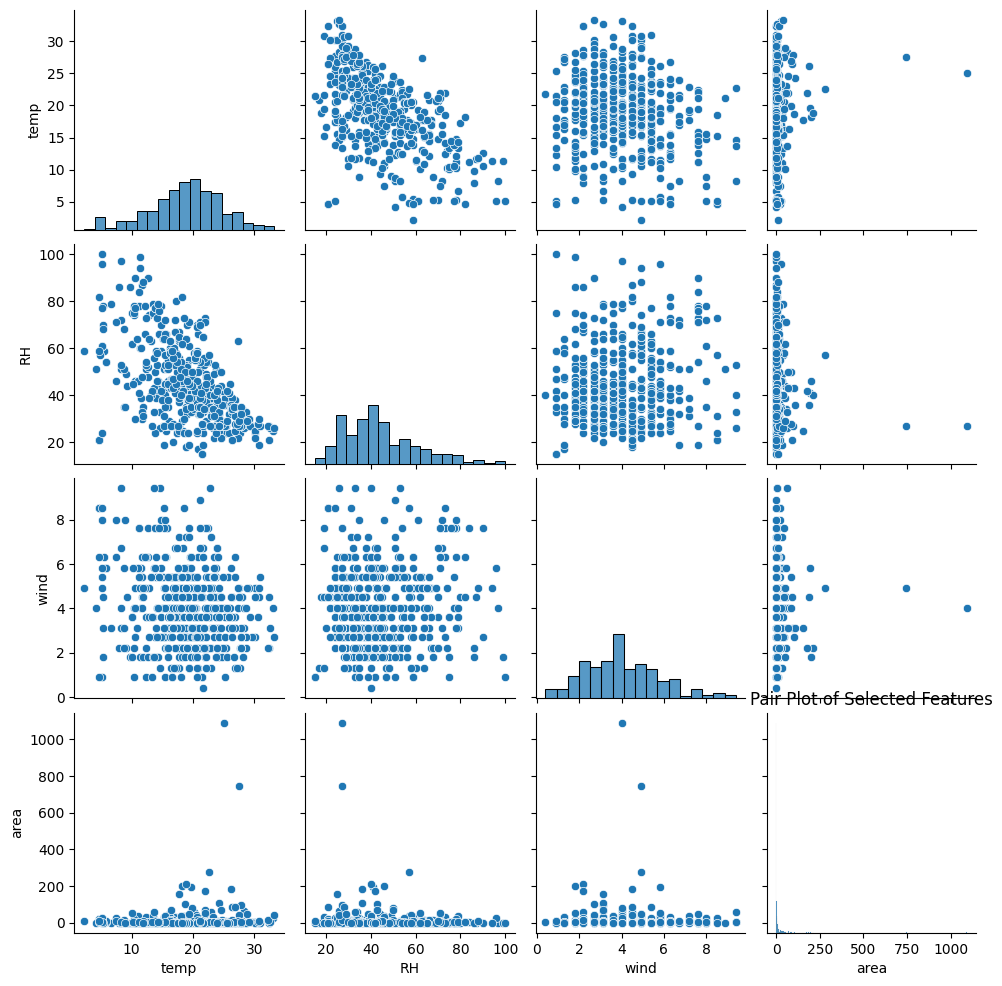

In [ ]:
selected_features = ['temp', 'RH', 'wind', 'area']
sns.pairplot(df[selected_features])
plt.title('Pair Plot of Selected Features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' should be all columns except 'area' and 'y' should be 'area'
X = df.drop('area', axis=1)  # Features (all columns except 'area')
y = df['area']  # Target variable



In [ ]:
import numpy as np

# Min-Max Normalization
normalized_data = (df - np.min(df, axis=0)) / (np.max(df, axis=0) - np.min(df, axis=0))

print(normalized_data)

         X         Y      FFMC       DMC        DC       ISI      temp  \
0    0.750  0.428571  0.870968  0.086492  0.101325  0.090909  0.192926   
1    0.750  0.285714  0.927742  0.118194  0.775419  0.119430  0.508039   
2    0.750  0.285714  0.927742  0.146795  0.796294  0.119430  0.398714   
3    0.875  0.571429  0.941935  0.110958  0.081623  0.160428  0.196141   
4    0.875  0.571429  0.910968  0.172984  0.110590  0.171123  0.295820   
..     ...       ...       ...       ...       ...       ...       ...   
512  0.375  0.142857  0.811613  0.191592  0.771315  0.033868  0.823151   
513  0.125  0.285714  0.811613  0.191592  0.771315  0.033868  0.633441   
514  0.750  0.285714  0.811613  0.191592  0.771315  0.033868  0.610932   
515  0.000  0.285714  0.976774  0.499311  0.711622  0.201426  0.752412   
516  0.625  0.142857  0.784516  0.006547  0.115867  0.019608  0.308682   

           RH      wind     rain      area  
0    0.423529  0.700000  0.00000  0.000000  
1    0.211765  0.0555

In [ ]:
# Split the normalized data into features and target
X = normalized_data.iloc[:, :-1]  # All columns except the last one
y = normalized_data.iloc[:, -1]    # Last column as the target


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression from Scratch**

In [ ]:
class LinearRegressionFromScratch:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of 1s to X for the intercept term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Calculate the coefficients using the OLS formula
        self.coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Add a column of 1s to X for the intercept term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Predict using the coefficients
        return X_b.dot(self.coefficients)



In [ ]:
# Initialize the model
model = LinearRegressionFromScratch()

# Convert X_train to a NumPy array with numeric dtype
X_train_num = X_train.select_dtypes(include=np.number).to_numpy()

# Train the model using the numeric data
model.fit(X_train_num, y_train)

In [ ]:
# Predict on training and testing sets
# Convert X_train and X_test to NumPy arrays with numeric dtype for prediction
X_train_num_pred = X_train.select_dtypes(include=np.number).to_numpy()
X_test_num_pred = X_test.select_dtypes(include=np.number).to_numpy()

y_train_pred = model.predict(X_train_num_pred)
y_test_pred = model.predict(X_test_num_pred)

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate MSE for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

Training MSE: 0.0016878128329398995
Testing MSE: 0.009882870233317421


In [ ]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Calculate R-squared for training and testing sets
r2_train = r_squared(y_train, y_train_pred)
r2_test = r_squared(y_test, y_test_pred)

print(f"Training R²: {r2_train}")
print(f"Testing R²: {r2_test}")

Training R²: 0.03427152428754998
Testing R²: 0.0023600333037150367


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for training data
train_predictions = model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_predictions)
print(f"Training MAE: {train_mae}")

# Calculate MAE for testing data
test_predictions = model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)
print(f"Testing MAE: {test_mae}")

Training MAE: 0.014925333717590692
Testing MAE: 0.022568022209447734


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for training data
train_predictions = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print(f"Training RMSE: {train_rmse}")

# Calculate RMSE for testing data
test_predictions = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Testing RMSE: {test_rmse}")

Training RMSE: 0.04108299931772143
Testing RMSE: 0.09941262612624928


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# Evaluate models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print results
print(f"Linear Regression - MSE: {mse_linear:.4f}, MAE: {mae_linear:.4f}, R²: {r2_linear:.4f}")
print(f"Decision Tree - MSE: {mse_tree:.4f}, MAE: {mae_tree:.4f}, R²: {r2_tree:.4f}")

Linear Regression - MSE: 0.0099, MAE: 0.0226, R²: 0.0024
Decision Tree - MSE: 0.0106, MAE: 0.0241, R²: -0.0683


**3. Building a Model from Scratch only Linear**

In [ ]:
# Initialize parameters
def initialize_params(d):
    b = 0  # Bias
    w = np.zeros(d)  # Weights
    return b, w

# Linear function
def linear_function(b, w, X):
    return np.dot(X, w) + b

# Cost function (MSE)
def cost_function(y_true, y_pred):
    m = len(y_true)
    return np.sum((y_true - y_pred) ** 2) / (2 * m)

# Gradient descent update
def update_parameters(y_true, y_pred, X, b, w, alpha):
    m = len(y_true)
    dw = -np.dot(X.T, (y_true - y_pred)) / m
    db = -np.mean(y_true - y_pred)
    w -= alpha * dw
    b -= alpha * db
    return b, w

# Training function
def train_linear_regression(X_train, y_train, n_iter=5000, alpha=0.01):
    b, w = initialize_params(X_train.shape[1])
    cost_history = []

    for i in range(n_iter):
        y_hat = linear_function(b, w, X_train)
        cost_now = cost_function(y_train, y_hat)
        b, w = update_parameters(y_train, y_hat, X_train, b, w, alpha)
        cost_history.append(cost_now)

    return b, w, cost_history

# Train from-scratch model
b, w, cost_history = train_linear_regression(X_train, y_train, n_iter=5000, alpha=0.01)

# Predictions on test set
y_test_pred_scratch = linear_function(b, w, X_test)

# Evaluation
test_mse_scratch = mean_squared_error(y_test, y_test_pred_scratch)
test_r2_scratch = r2_score(y_test, y_test_pred_scratch)

print(f"From Scratch Model - MSE: {test_mse_scratch:.4f}, R²: {test_r2_scratch:.4f}")

From Scratch Model - MSE: 0.0099, R²: 0.0016


**4.Hyperparameter with Cross-Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV

For decision tree


In [ ]:
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

best_dt_params = dt_grid_search.best_params_
print(f"Best Hyperparameters for Decision Tree: {best_dt_params}")

tree_best = DecisionTreeRegressor(**best_dt_params, random_state=42)
tree_best.fit(X_train, y_train)

tree_preds = tree_best.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_preds)
print(f"Decision Tree Test MSE: {tree_mse}")

Best Hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Test MSE: 0.008844558727812202


In [ ]:
from sklearn.linear_model import Ridge
# Define parameter grid for Ridge (L2)
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV
ridge_grid = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Best hyperparameter
best_ridge_alpha = ridge_grid.best_params_['alpha']
print(f"Best Ridge alpha: {best_ridge_alpha}")

# Train Ridge model with best alpha
ridge_best = Ridge(alpha=best_ridge_alpha)
ridge_best.fit(X_train, y_train)

# Predict & Evaluate Ridge
ridge_preds = ridge_best.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)
print(f"Ridge Test MSE: {ridge_mse}")


Best Ridge alpha: 10
Ridge Test MSE: 0.009899463627963833


**5. Feature Selection**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression

# Initialize the models for RFE
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)

# Initialize RFE for Linear Regression
rfe_linear = RFE(estimator=linear_model, n_features_to_select=5)
X_train_rfe_linear = rfe_linear.fit_transform(X_train, y_train)
X_test_rfe_linear = rfe_linear.transform(X_test)

# Initialize RFE for Decision Tree
rfe_tree = RFE(estimator=tree_model, n_features_to_select=4)
X_train_rfe_tree = rfe_tree.fit_transform(X_train, y_train)
X_test_rfe_tree = rfe_tree.transform(X_test)

linear_ranking = rfe_linear.ranking_
tree_ranking = rfe_tree.ranking_

print("Linear Model Feature Rankings:")
for feature, rank in zip(X.columns, linear_ranking):
    print(f"{feature}: Rank {rank}")

print("\nDecision Tree Feature Rankings:")
for feature, rank in zip(X.columns, tree_ranking):
    print(f"{feature}: Rank {rank}")


Linear Model Feature Rankings:
X: Rank 1
Y: Rank 6
FFMC: Rank 4
DMC: Rank 1
DC: Rank 3
ISI: Rank 1
temp: Rank 2
RH: Rank 1
wind: Rank 5
rain: Rank 1

Decision Tree Feature Rankings:
X: Rank 5
Y: Rank 2
FFMC: Rank 4
DMC: Rank 1
DC: Rank 1
ISI: Rank 1
temp: Rank 1
RH: Rank 3
wind: Rank 6
rain: Rank 7


**6. Final Model**

In [ ]:

# Feature Selection using RFE
linear_model = LinearRegression()
rfe_linear = RFE(estimator=linear_model, n_features_to_select=5)
rfe_linear.fit(X_train, y_train)

# selected features
selected_features = X.columns[rfe_linear.support_]
X_train_rfe = rfe_linear.transform(X_train)
X_test_rfe = rfe_linear.transform(X_test)

# Rebuild the Linear Regression model with selected features
linear_model_final = LinearRegression()
linear_model_final.fit(X_train_rfe, y_train)

# Predictions and evaluation for Linear Regression
y_test_pred_lr = linear_model_final.predict(X_test_rfe)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print(f"Linear Regression - MSE: {test_mse_lr:.4f}, R²: {test_r2_lr:.4f}")

# Rebuild the Decision Tree model with optimal hyperparameters
tree_model_final = DecisionTreeRegressor(max_depth=best_dt_params['max_depth'],
                                          min_samples_split=best_dt_params['min_samples_split'],
                                          min_samples_leaf=best_dt_params['min_samples_leaf'],
                                          random_state=42)
tree_model_final.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree
y_test_pred_dt = tree_model_final.predict(X_test)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

print(f"Decision Tree - MSE: {test_mse_dt:.4f}, R²: {test_r2_dt:.4f}")



Linear Regression - MSE: 0.0099, R²: 0.0014
Decision Tree - MSE: 0.0088, R²: 0.1072


the Decision Tree model outperforms the Linear Regression model in both MSE and R²

Feature Selection with Recursive Feature Elimination (RFE) improved performance by reducing dimensionality and focusing on relevant features.
Feature Selection emphasized the importance of using the right features for better predictive performance.